### Linear Regression

In [1]:
import pandas as pd

In [3]:
pd.read_csv('Documents/medical.csv')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Predicting Medical Expenses Using Linear Regression

In [6]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

In [8]:
df = pd.read_csv('Documents/medical.csv')

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Data Understanding

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Checking Skewness and doing feature engineering

In [30]:
# we use boxplot to check for outliers
# Histogram is used to check for distribution

df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 24.9, 29.9, 39.9, 100],
    labels = ['Under Weight', 'Normal Weight', 'Over Weight', 'Obesity', 'Morbid Obesity']
)

In [33]:
df['age group'] = pd.cut(
    df['age'],
    bins = [0, 8, 17, 30, 50, 100],
    labels = ['children', 'Teenagers', 'Young Adults', 'Adults', 'Aged']   
)

In [35]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,age group
0,19,female,27.900,0,yes,southwest,16884.92400,Over Weight,Young Adults
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,Young Adults
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,Young Adults
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,Adults
4,32,male,28.880,0,no,northwest,3866.85520,Over Weight,Adults


In [37]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(['object']).columns 

In [39]:
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [41]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

### Visualization

In [44]:
import matplotlib.pyplot as plt

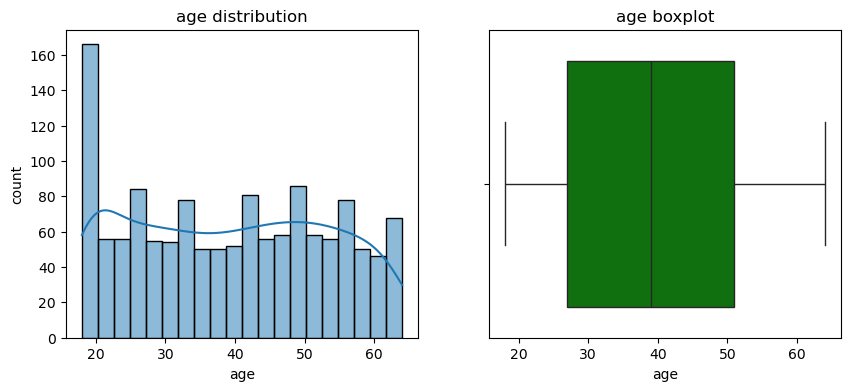

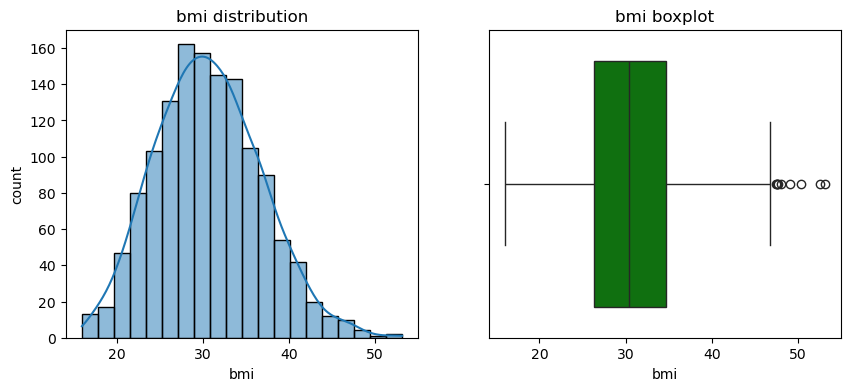

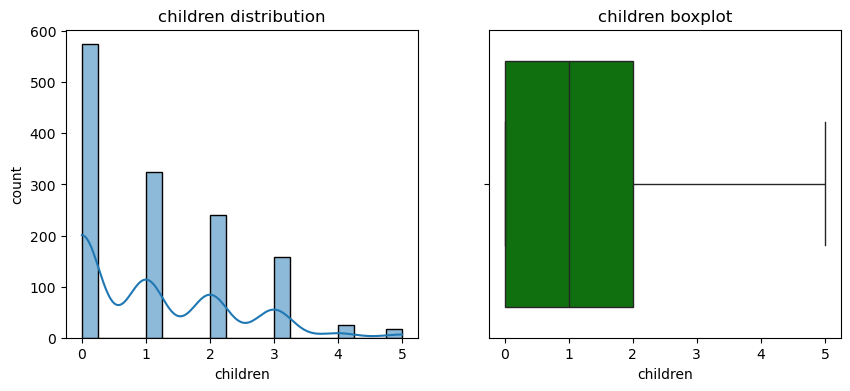

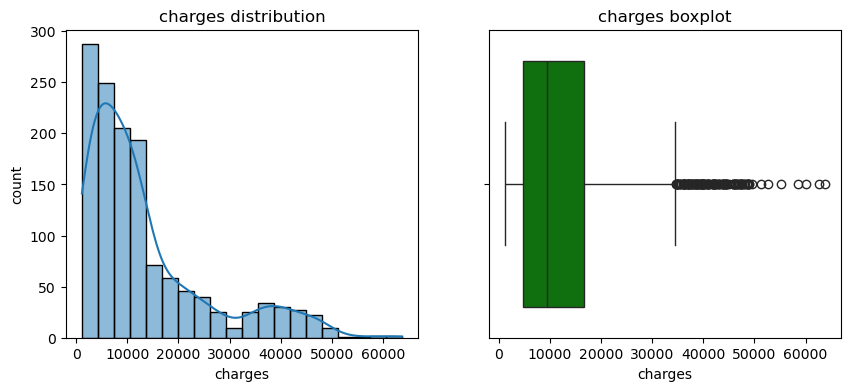

In [50]:
# Univariate

#num_cols
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')

# boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col], color='green')
    plt.title(f'{col} boxplot')
    plt.xlabel(col)

plt.show()

In [ ]:
# we use square root transformation
# logarithm transformation
# inverse transformation

In [52]:
# correlation matrix
corr_matrix = df[num_cols].corr()

In [60]:
plt.show()

### Data Splitting

In [154]:
x = df.drop(columns=['charges', 'log_charges'])
y = df['log_charges']

In [156]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,age group,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,Over Weight,Young Adults,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,Obesity,Young Adults,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,Obesity,Young Adults,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,Adults,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,Over Weight,Adults,8.260197


In [160]:
# charges is target variable so it will be y
# every other one will be x axis

x = df.drop(columns=['charges', 'log_charges'])
y = df['log_charges']

In [162]:
x

,age,sex,bmi,children,smoker,region,bmi_category,age group
0,19,female,27.900,0,yes,southwest,Over Weight,Young Adults
1,18,male,33.770,1,no,southeast,Obesity,Young Adults
2,28,male,33.000,3,no,southeast,Obesity,Young Adults
3,33,male,22.705,0,no,northwest,Normal Weight,Adults
4,32,male,28.880,0,no,northwest,Over Weight,Adults
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,Obesity,Adults
1334,18,female,31.920,0,no,northeast,Obesity,Young Adults
1335,18,female,36.850,0,no,southeast,Obesity,Young Adults
1336,21,female,25.800,0,no,southwest,Over Weight,Young Adults


In [164]:
y

0        9.734176
1        7.453302
2        8.400538
3        9.998092
4        8.260197
          ...    
1333     9.268661
1334     7.698927
1335     7.396233
1336     7.604867
1337    10.279914
Name: log_charges, Length: 1338, dtype: float64

In [166]:
from sklearn.model_selection import train_test_split

In [168]:
# x is the features
# y is the target variable. The target variable is the outlier, the one against which you're comparing every other variable against. in this example charges is the target variable.

# for features which is x it will split into
#train_input, test_input

# for target which is y
#train_target, test_target

train_inputs, test_input, train_target, test_target=train_test_split(x, y, test_size=0.2, random_state=42) 

### Data Pre Processing

In [171]:
# encoding of our categorical data in the numerical way that python understands
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [173]:
encoder = OneHotEncoder(drop='first')

In [175]:
train_inputs.head()

,age,sex,bmi,children,smoker,region,bmi_category,age group
560,46,female,19.95,2,no,northwest,Normal Weight,Adults
1285,47,female,24.32,0,no,northeast,Normal Weight,Adults
1142,52,female,24.86,0,no,southeast,Normal Weight,Aged
969,39,female,34.32,5,no,southeast,Obesity,Adults
486,54,female,21.47,3,no,northwest,Normal Weight,Aged


In [177]:
train_cat = encoder.fit_transform(train_inputs[cat_cols])
test_cat = encoder.transform(test_input[cat_cols])

In [179]:
train_cat.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.]])

In [181]:
test_cat.toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Scaling

In [184]:
# the purpose of scaling is to put all data in the same range. 
#Without putting all the data in the same range, it is going to base only on the larger number 
#and the great impact will be on the larger value
# if you don't scale it, the model will be bias and will only utilise the data which falls on the bigger value
# there are two major types of scaling:

In [186]:
scaler = StandardScaler()

In [188]:
numerical_column = ['age', 'bmi', 'children']

In [190]:
train_num = scaler.fit_transform(train_inputs[numerical_column])
test_num = scaler.transform(test_input[numerical_column])

In [192]:
train_num

array([[ 0.47222651, -1.75652513,  0.73433626],
       [ 0.54331294, -1.03308239, -0.91119211],
       [ 0.8987451 , -0.94368672, -0.91119211],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211],
       [-0.16755139,  2.82086429,  0.73433626],
       [ 1.1120044 , -0.10932713, -0.91119211]])

In [194]:
test_num

array([[ 0.40114007, -0.89153925,  0.73433626],
       [-0.23863782, -0.08946143, -0.91119211],
       [ 1.75178229, -0.60845296, -0.91119211],
       [ 0.47222651, -0.79717715,  1.55710045],
       [-1.44710717,  0.2250789 , -0.91119211],
       [-0.38081068,  2.04279086, -0.08842793],
       [-1.44710717, -1.3318957 , -0.91119211],
       [ 1.75178229,  1.21588091, -0.91119211],
       [-0.80732928, -2.19688158, -0.91119211],
       [ 0.6854858 , -0.30963965,  1.55710045],
       [-0.66515641, -1.01983859,  1.55710045],
       [ 0.11679434,  0.00490067,  0.73433626],
       [-0.73624285, -0.16064687, -0.08842793],
       [ 0.47222651,  1.95173971,  1.55710045],
       [ 1.46743656,  1.71500674, -0.91119211],
       [ 0.54331294,  1.38722261,  0.73433626],
       [ 0.6854858 ,  2.0063704 ,  0.73433626],
       [ 0.54331294,  1.0048078 , -0.08842793],
       [ 0.47222651, -0.41559007, -0.08842793],
       [ 0.25896721, -0.60845296, -0.91119211],
       [-1.02058858, -1.10261236,  3.202

In [196]:
# combining
train_processed = np.hstack((train_num, train_cat.toarray()))
test_processed = np.hstack((test_num, test_cat.toarray()))

In [198]:
train_processed

array([[ 0.47222651, -1.75652513,  0.73433626, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.54331294, -1.03308239, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8987451 , -0.94368672, -0.91119211, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.16755139,  2.82086429,  0.73433626, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.1120044 , -0.10932713, -0.91119211, ...,  0.        ,
         0.        ,  1.        ]])

### Model Selection

In [201]:
from sklearn.linear_model import LinearRegression

In [203]:
model = LinearRegression()

### Model Training

In [206]:
model.fit(train_processed, train_target)

LinearRegression()

In [208]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

### Model Evaluation

In [211]:
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(train_pred, train_target)
test_mse = mean_squared_error(test_pred, test_target)

In [215]:
train_mse, test_mse

(0.20155925808862676, 0.17557416396791672)

### Model Performance

In [218]:
train_mse, test_mse

In [220]:
train_score, test_score

(0.6793926390725691, 0.7436831176616672)

In [222]:
df['log_charges'] = np.log(df['charges'])

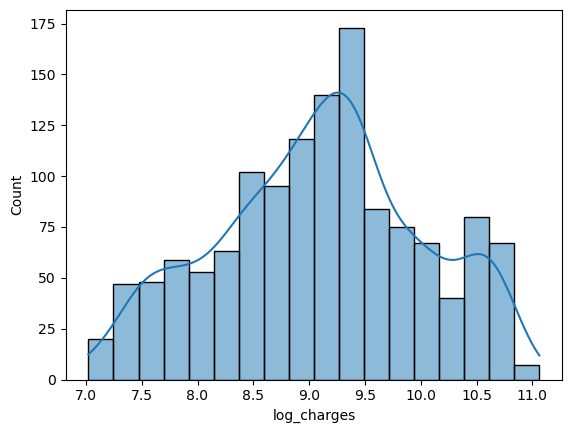

In [224]:
sns.histplot(df['log_charges'], kde=True)
plt.show()

In [ ]:
# Model Overfitting